## Imported libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os
os.chdir('D:/Study/2022/Python/Sample Projects/Traffic Signs Recognition/archive')
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

## Lists and variable creation

In [10]:
# Empty list to store images converted to arrays and their corresponding class/folder number
data = []
labels = []
# We have 43 different image folders in training data set
totalClass = 43
current_path = os.getcwd()

In [11]:
current_path

'D:\\Study\\2022\\Python\\Sample Projects\\Traffic Signs Recognition\\archive'

## Preprocessing images from the training data set

In [12]:
# iterate over the training data set folder. Each image converted to array and stored in data list. 
for i in range(totalClass):
    path = os.path.join(current_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

## Converting list of arrays into array of arrays

In [13]:
data = np.array(data)
labels = np.array(labels)

In [15]:
# Creating a new directory to store above 2 numpy arrays in .npy file format, for future use
# This file format makes incredibly fast reading speed enhancement over reading from plain text or CSV files.
os.mkdir('training')

In [16]:
np.save('./training/data',data)
np.save('./training/target',labels)

In [18]:
# To check shapes of data array and label array
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


## Spliting arrays into 2 subsets

In [19]:
# training data (80%) and validation/testing data (20%). Spliting is good strategy because we can use test data 
# to test the model and since model has not seen test data before, we will get a good measurement of accuracy
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [21]:
# shape of new arrays
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


## Converting labels to onehot encoding

In [22]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

## Building the model 

In [23]:
# Intializing the forwardfeeding convolutional model using keras.Models
model = Sequential()
# Adding convolutional layer as our first hidden layer
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
# MaxPooling the data from a 2x2 subset 
model.add(MaxPool2D(pool_size=(2, 2)))
# Taking every 1/4 tensors randomly and setting them to zero.
model.add(Dropout(rate=0.25))
# repeating the above process and second time
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
# Flattening the 2D dataset 
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
# We have 43 classes that's why we have defined 43 in the dense
model.add(Dense(43, activation='softmax'))

In [24]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
epochs = 21
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/21
981/981 [==============================] - 84s 85ms/step - loss: 3.3828 - accuracy: 0.1253 - val_loss: 1.6068 - val_accuracy: 0.5737
Epoch 2/21
981/981 [==============================] - 85s 87ms/step - loss: 1.1210 - accuracy: 0.6814 - val_loss: 0.3981 - val_accuracy: 0.9010
Epoch 3/21
981/981 [==============================] - 83s 85ms/step - loss: 0.5368 - accuracy: 0.8451 - val_loss: 0.2072 - val_accuracy: 0.9461
Epoch 4/21
981/981 [==============================] - 83s 85ms/step - loss: 0.3591 - accuracy: 0.8971 - val_loss: 0.1423 - val_accuracy: 0.9637
Epoch 5/21
981/981 [==============================] - 82s 84ms/step - loss: 0.3203 - accuracy: 0.9123 - val_loss: 0.1147 - val_accuracy: 0.9730
Epoch 6/21
981/981 [==============================] - 83s 85ms/step - loss: 0.2779 - accuracy: 0.9249 - val_loss: 0.0911 - val_accuracy: 0.9762
Epoch 7/21
981/981 [==============================] - 88s 89ms/step - loss: 0.2502 - accuracy: 0.9334 - val_loss: 0.0667 - val_accuracy:

## Plotting graphs

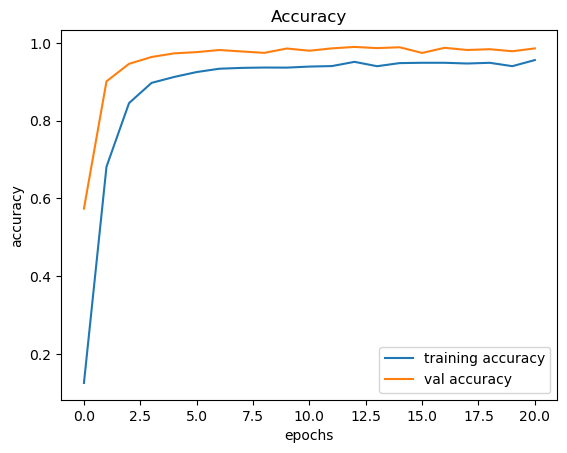

In [26]:
# Below graphs highlights stored accuracy and validation accuracy data to their respective epoch. 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

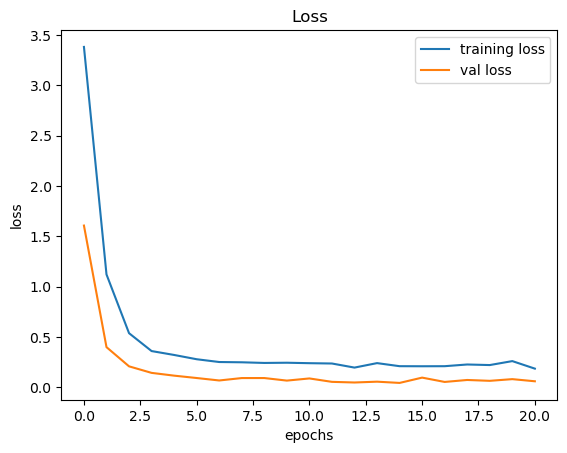

In [27]:
# Below graphs highlights stored accuracy loss and validation accuracy loss data to their respective epoch. 
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## Using the model to run a test on test data

In [28]:
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,label

In [29]:
X_test, label = testing('Test.csv')

In [30]:
predict_x=model.predict(X_test) 
Y_pred=np.argmax(predict_x,axis=1)
Y_pred

array([16,  1, 38, ..., 32,  7, 10], dtype=int64)

## Calculating accuracy score

In [36]:
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(label, Y_pred)
print("{:.4f}".format(acc_score * 100),"%")

94.9802 %


## Save the model

In [37]:
model.save("./training/TSR.h5")

## Load the model

In [38]:
import os
os.chdir(r'D:/Study/2022/Python/Sample Projects/Traffic Signs Recognition/archive')
from tensorflow.keras.models import load_model
model = load_model('./training/TSR.h5')

In [39]:
# A dictionary to indicate each indiviual class to its traffic sign meaning
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing',
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [43]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    predict_x=model.predict(X_test) 
    Y_pred=np.argmax(predict_x,axis=1)
    #Y_pred = model.predict_classes(X_test)
    return image,Y_pred

Predicted traffic sign is:  Speed limit (60km/h)


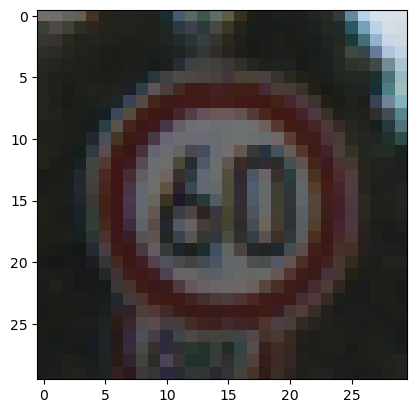

In [47]:
plot,prediction = test_on_img(r'D:\Study\2022\Python\Sample Projects\Traffic Signs Recognition\archive\Test\00420.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()